In [1]:
# Thiết lập môi trường và import thư viện
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Thiết lập đường dẫn gốc của project để import các module từ src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"Thư mục làm việc hiện tại: {os.getcwd()}")

Thư mục làm việc hiện tại: /home/giahan/L02


In [2]:
# Import các hàm đã xây dựng từ package `src`
from src.data_processing import load_data
from src.visualization import (
    plot_numerical_distribution,
    plot_categorical_distribution,
    plot_missing_values,
    plot_correlation_heatmap,
    plot_numerical_vs_categorical,
    plot_categorical_vs_categorical,
    plot_scatter_numerical
)

print("Các hàm từ `src` đã được import thành công.")

[2025-11-18 20:14:29,037] [INFO] [src] - SRC package phiên bản 1.0.0 đã được khởi tạo
Các hàm từ `src` đã được import thành công.


In [3]:
# Tải dữ liệu thô
file_path = 'data/raw/aug_test.csv'
data = load_data(file_path)

[2025-11-18 20:14:29,095] [INFO] [src.data_processing] - Tải dữ liệu thành công từ 'data/raw/aug_test.csv'.


In [4]:
# Kiểm tra thông tin tổng quan của dữ liệu
if data.size > 0:
    print(f"Kích thước: {len(data)} hàng, {len(data.dtype.names)} cột.\n")
    print(f"Tên các cột: {data.dtype.names}\n")
    print("5 dòng đầu tiên:\n", data[:5])

Kích thước: 2129 hàng, 13 cột.

Tên các cột: ('enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours')

5 dòng đầu tiên:
 [(32403, 'city_41', 0.827, 'Male', 'Has relevent experience', 'Full time course', 'Graduate', 'STEM', '9', '<10', '', '1', 21)
 ( 9858, 'city_103', 0.92 , 'Female', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '5', '', 'Pvt Ltd', '1', 98)
 (31806, 'city_21', 0.624, 'Male', 'No relevent experience', 'no_enrollment', 'High School', '', '<1', '', 'Pvt Ltd', 'never', 15)
 (27385, 'city_13', 0.827, 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '11', '10/49', 'Pvt Ltd', '1', 39)
 (27724, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '10000+', 'Pvt Ltd', '>4', 72)]


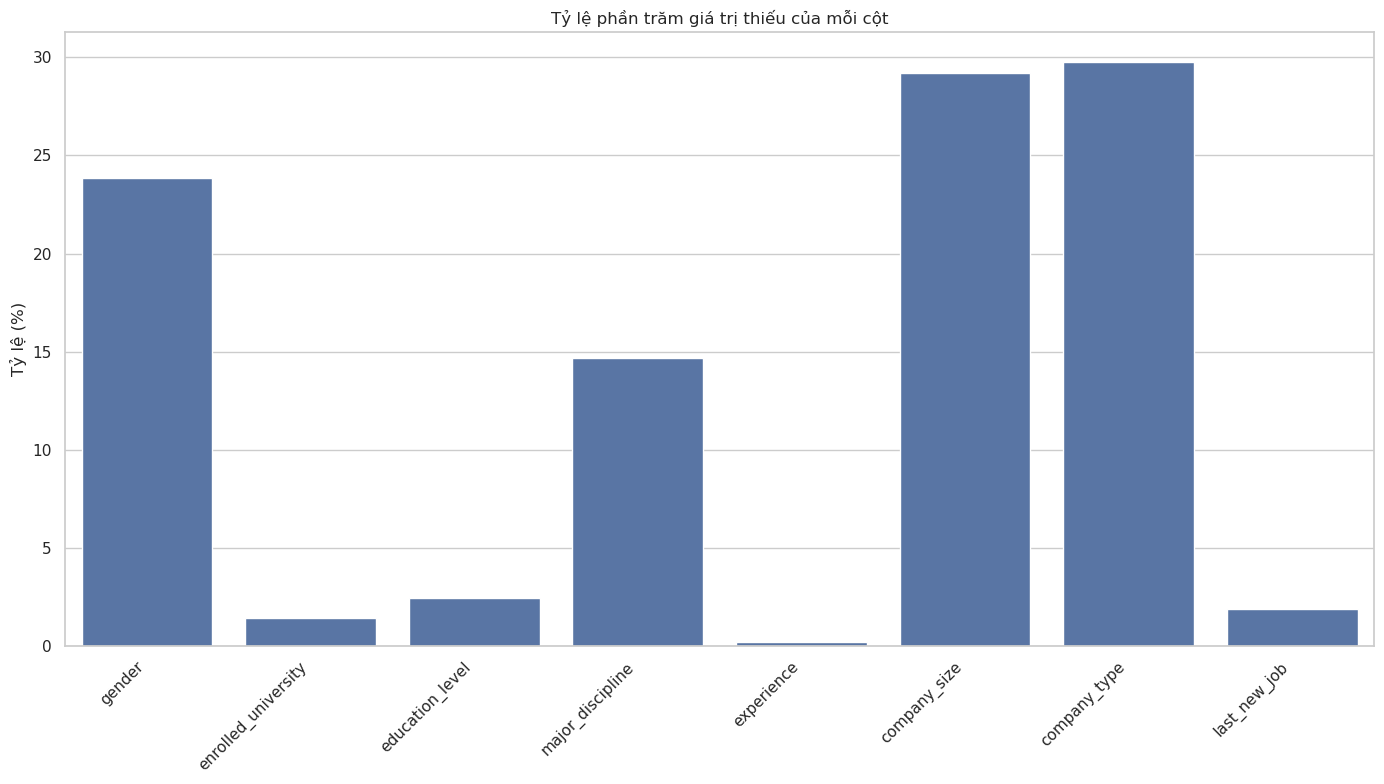

In [5]:
# Phân tích các giá trị bị thiếu (Missing Values)
if data.size > 0:
    plot_missing_values(data)

### Phân tích Tỷ lệ Giá trị Thiếu

Biểu đồ này cho thấy phần trăm dữ liệu bị bỏ trống trong mỗi cột.

#### Quan sát:
*   Các cột liên quan đến thông tin công ty như **`company_size`**, **`company_type`** bị thiếu nhiều nhất, với gần 30% dữ liệu trống. Điều này có thể do một số ứng viên là sinh viên hoặc chưa đi làm.
*   Cột **`gender`** và **`major_discipline`** cũng thiếu dữ liệu ở mức độ đáng kể.
*   Các thông tin quan trọng khác như **`education_level`** và **`experience`** gần như đầy đủ, cho thấy chất lượng tốt ở các cột này.

#### Kết luận:
*   Dữ liệu bị thiếu không phân bổ ngẫu nhiên mà tập trung ở một vài cột nhất định.
*   **Giải pháp:** Thay vì xóa các hàng bị thiếu, chúng ta sẽ lấp đầy các ô trống này bằng một giá trị đại diện là **`"Unknown"`**. Cách tiếp cận này giúp bảo toàn tối đa dữ liệu và coi việc "thiếu thông tin" là một đặc điểm riêng để phân tích.

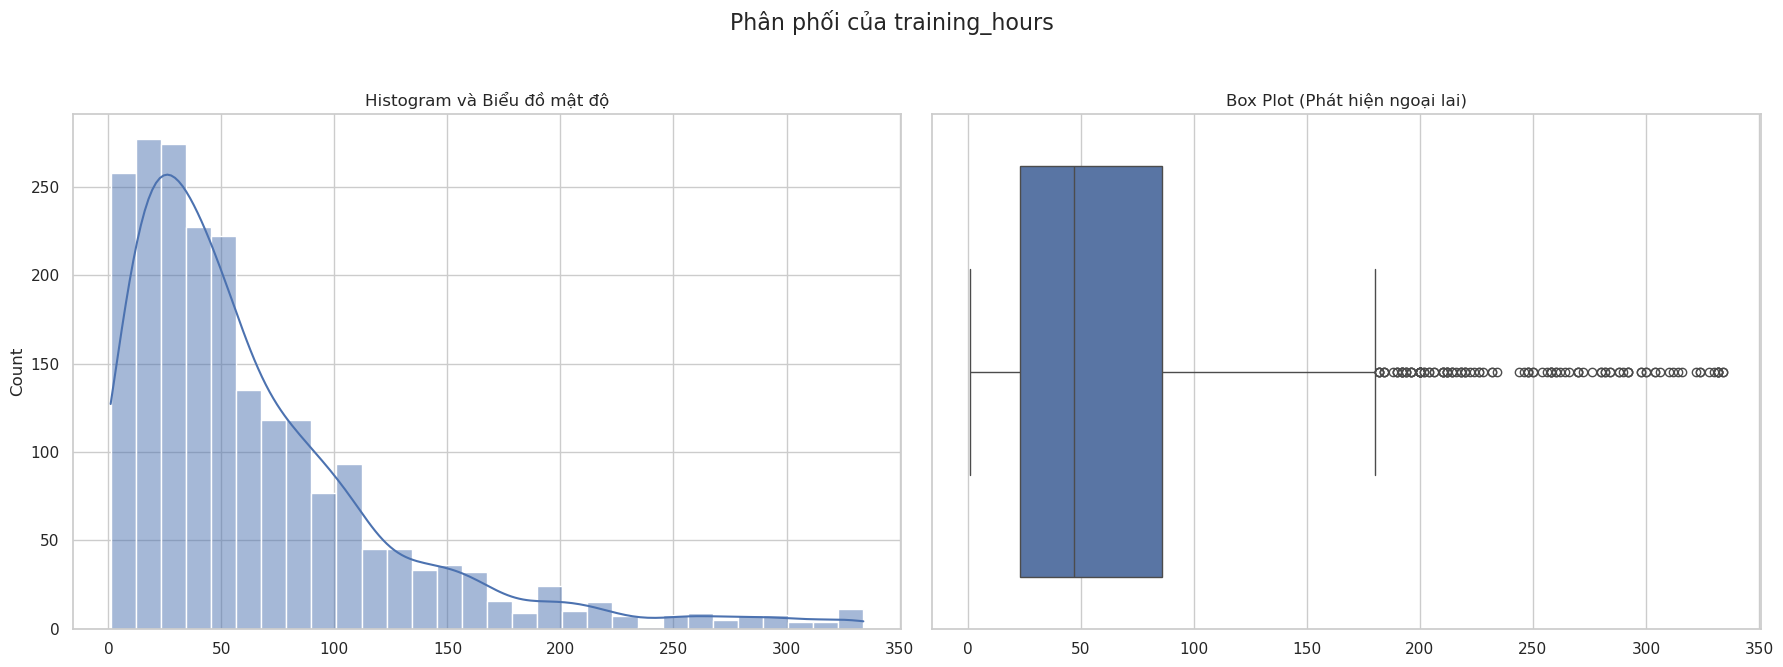

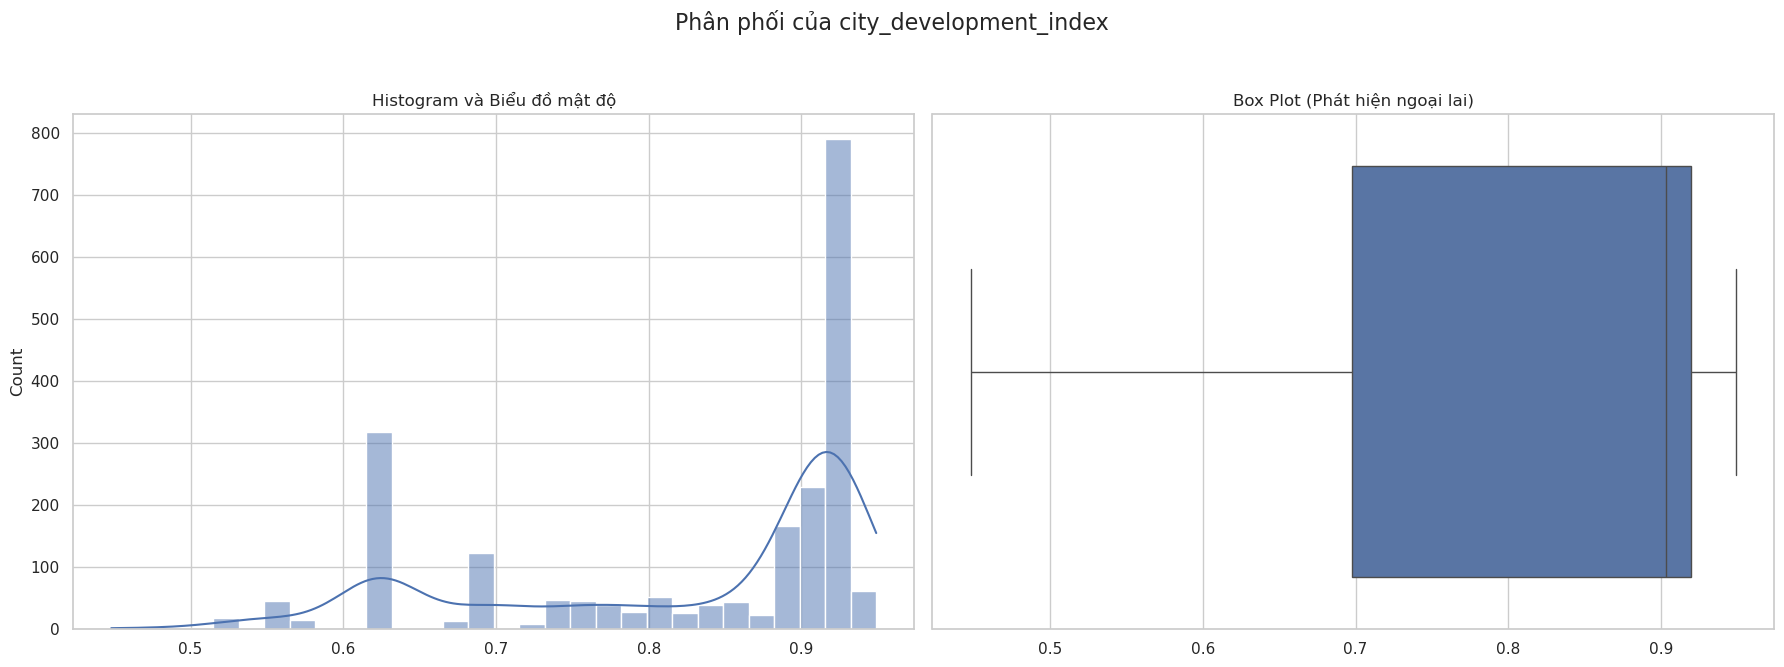

In [6]:
# Phân tích phân phối của các biến số
if data.size > 0:
    plot_numerical_distribution(data, 'training_hours')
    plot_numerical_distribution(data, 'city_development_index')

#### Quan sát chính:

1.  **Từ Histogram:**
    *   Phân phối của dữ liệu **lệch phải** một cách rõ rệt.
    *   Điều này có nghĩa là phần lớn ứng viên có số giờ training tương đối thấp với chỉ dưới 100 giờ, với số lượng tập trung đông nhất ở khoảng 20-50 giờ.
    *   Sau đó, tần suất giảm dần khi số giờ training tăng lên.

2.  **Từ Box Plot:**
    *   Biểu đồ hộp giúp chúng ta hiểu hơn về điều này. Phần hộp chứa 50% dữ liệu trung tâm khá nhỏ và nằm ở phía bên trái.
    *   Có **rất nhiều giá trị ngoại lai (outliers)**, được biểu thị bằng các chấm tròn nằm bên ngoài của biểu đồ. Các giá trị này trải dài từ khoảng 180 giờ đến hơn 300 giờ.

#### Kết luận:

*   **Vấn đề:** `training_hours` không tuân theo phân phối chuẩn. Sự tồn tại của nhiều giá trị ngoại lai có thể ảnh hưởng tiêu cực đến hiệu suất của một số mô hình học máy, vì chúng làm sai lệch các tính toán thống kê như trung bình và độ lệch chuẩn.

*   **Giải pháp:** Để giảm ảnh hưởng của các giá trị này, một phương pháp hiệu quả là **xử lý ngoại lai**. Việc giới hạn giá trị tối đa ở phân vị thứ 99 giúp mô hình tập trung hơn vào phần lớn dữ liệu mà không bị chi phối bởi các trường hợp cá biệt, từ đó cải thiện độ ổn định và hiệu quả khi chuẩn hóa dữ liệu sau này.

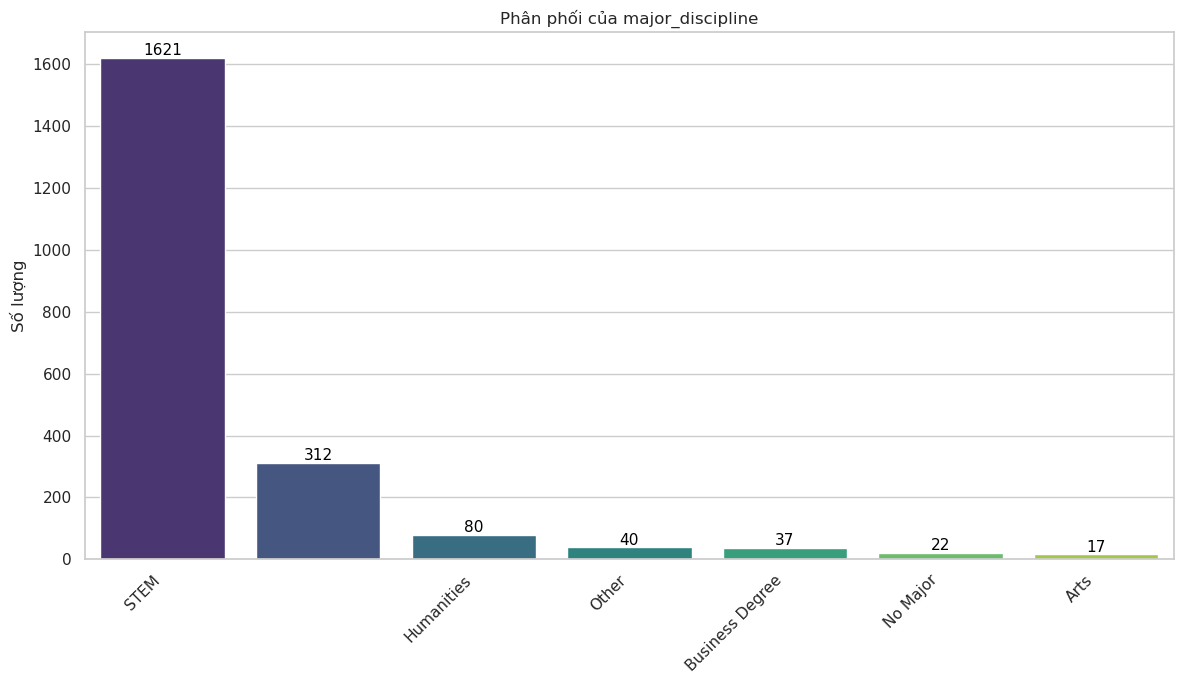

[2025-11-18 20:14:30,960] [INFO] [src.visualization] - Đã tạo biểu đồ cột cho 'major_discipline'.


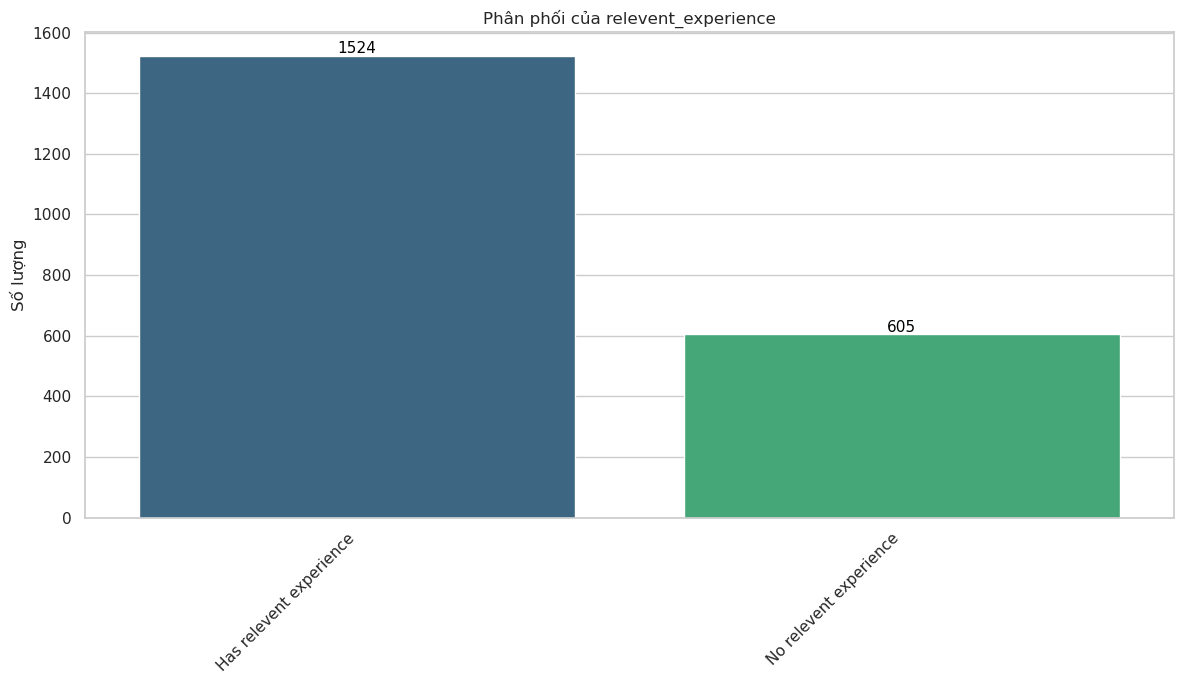

[2025-11-18 20:14:37,469] [INFO] [src.visualization] - Đã tạo biểu đồ cột cho 'relevent_experience'.


In [7]:
# Phân tích phân phối của các biến phân loại
if data.size > 0:
    plot_categorical_distribution(data, 'major_discipline')
    plot_categorical_distribution(data, 'relevent_experience')

#### 1. Phân tích Biểu đồ `major_discipline`

*   **Quan sát chính:**
    *   Biểu đồ cho thấy sự **chênh lệch rất lớn** về số lượng giữa các chuyên ngành.
    *   Chuyên ngành **STEM** chiếm đa số một cách áp đảo với hơn **1600** ứng viên.
    *   Các chuyên ngành còn lại như `Humanities`, `Other`, `Business Degree`, `No Major`, và `Arts` có số lượng rất nhỏ so với STEM.
*   **Ý nghĩa:**
    *   Dữ liệu này cho thấy đối tượng khảo sát chủ yếu là những người có nền tảng về STEM.
    *   Sự mất cân bằng này có thể là một yếu tố quan trọng. Mô hình học máy có thể sẽ học được nhiều đặc điểm từ nhóm STEM hơn so với các nhóm thiểu số khác.


#### 2. Phân tích Biểu đồ `relevent_experience`

*   **Quan sát chính:**
    *   Số lượng ứng viên **`Has relevent experience`** lớn hơn đáng kể so với nhóm **`No relevent experience`**.
    *   Tỷ lệ này là khoảng **1524** người so với **605** người, tức là nhóm có kinh nghiệm chiếm khoảng 71.6% tổng số.
*   **Ý nghĩa:**
    *   Đây là một đặc trưng binary quan trọng, cho thấy phần lớn ứng viên trong bộ dữ liệu đã có nền tảng hoặc kinh nghiệm trong lĩnh vực liên quan.
    *   Đặc trưng này có khả năng là một yếu tố dự đoán tốt. Ví dụ, những người đã có kinh nghiệm liên quan có thể có những hành vi hoặc đặc điểm khác biệt so với những người mới bắt đầu.

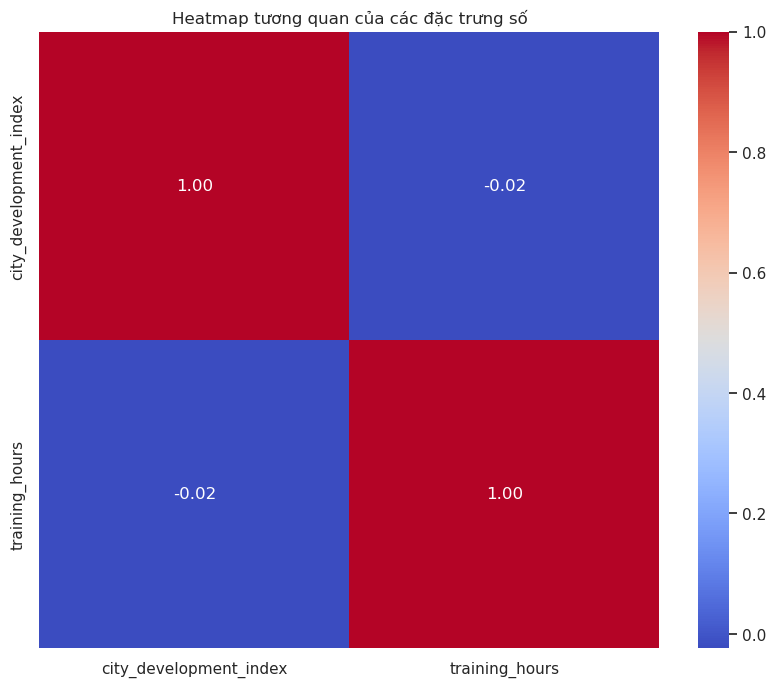

In [8]:
# Phân tích tương quan giữa các biến số
if data.size > 0:
    numerical_cols = ['city_development_index', 'training_hours']
    plot_correlation_heatmap(data, numerical_cols)

#### Quan sát chính:

*   **heatmap** dùng để đo lường mức độ tương quan tuyến tính giữa các biến số. Giá trị tương quan dao động từ -1 đến +1.
*   Mối tương quan giữa **`city_development_index`** và **`training_hours`** có giá trị là **-0.02**.

#### Ý nghĩa:

*   Một giá trị tương quan gần bằng **0** (như -0.02) cho thấy **hầu như không có mối quan hệ tuyến tính** nào giữa hai biến này.
*   Nói cách khác, việc một ứng viên sống ở thành phố phát triển hơn hay kém hơn không giúp chúng ta suy ra được họ đã tham gia nhiều hay ít giờ đào tạo, và ngược lại.
*   **Kết luận:** Hai đặc trưng này cung cấp thông tin độc lập cho mô hình. Việc chúng không tương quan với nhau là một điều tốt, vì nó tránh được hiện tượng đa cộng tuyến, giúp mô hình ổn định hơn.

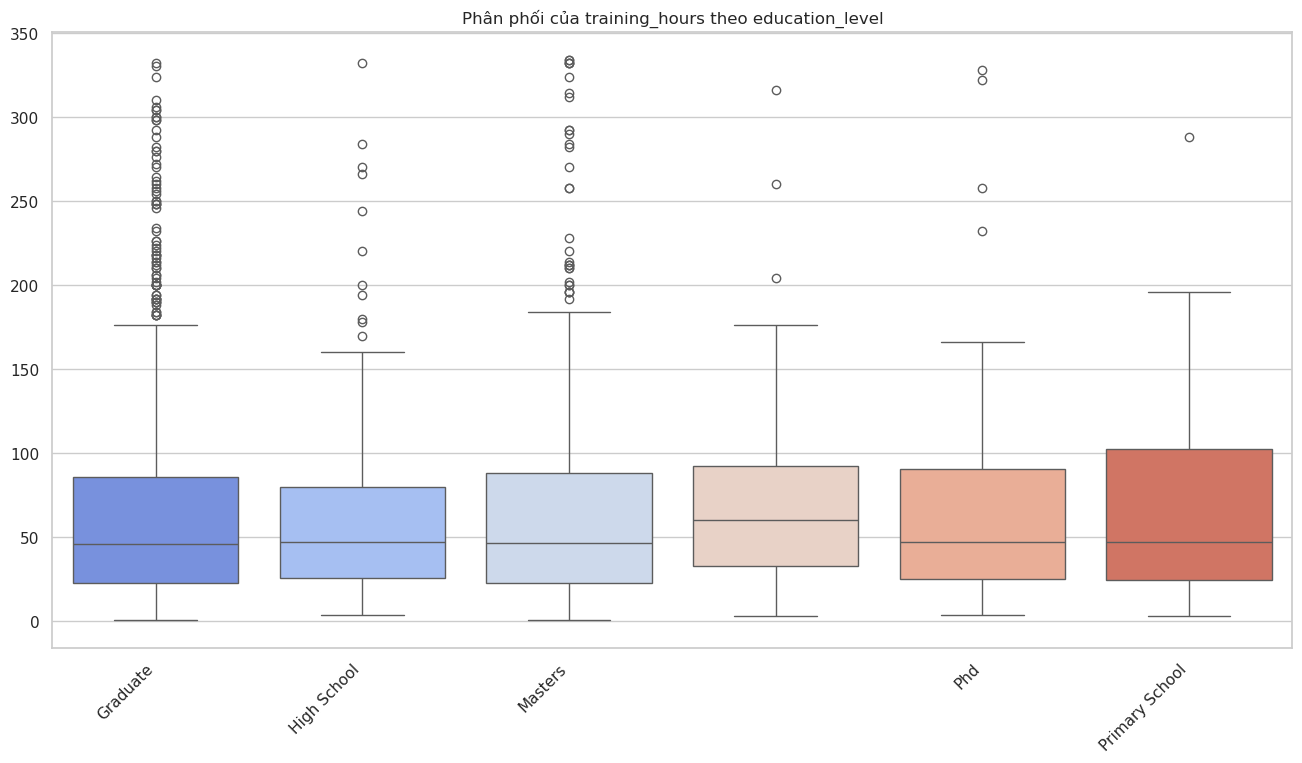

In [9]:
# Mối quan hệ giữa biến số và biến phân loại
if data.size > 0:
    plot_numerical_vs_categorical(data, 'training_hours', 'education_level')

#### Quan sát chính:

*   Box plot để so sánh phân phối của `training_hours` giữa các nhóm có `education_level` khác nhau.
*   Nhìn chung, **không có sự khác biệt quá lớn** về số giờ đào tạo trung bình giữa các nhóm học vấn từ `Graduate` đến `Phd`. Giá trị median của các nhóm này đều dao động quanh mức 50 giờ.
*   Nhóm `Primary School` có vẻ có số giờ đào tạo trung bình cao hơn một chút so với các nhóm khác, tuy nhiên số lượng mẫu ở nhóm này rất nhỏ nên khó có thể đưa ra kết luận chắc chắn.
*   Tất cả các nhóm đều có rất nhiều **outliers**, đặc biệt là ở nhóm `Graduate`, cho thấy có những cá nhân ở mọi trình độ học vấn tham gia các khóa đào tạo rất dài.

#### Ý nghĩa:

*   Trình độ học vấn **không phải là yếu tố quyết định** đến việc một người sẽ dành bao nhiêu thời gian cho việc đào tạo thêm.
*   Điều này cho thấy nhu cầu học hỏi và nâng cao kỹ năng là phổ biến ở mọi cấp độ học vấn, từ cử nhân đến tiến sĩ. Các quyết định về thời gian đào tạo có thể phụ thuộc vào các yếu to khác như yêu cầu công việc, định hướng cá nhân, hoặc kinh nghiệm làm việc hơn là bằng cấp học thuật.

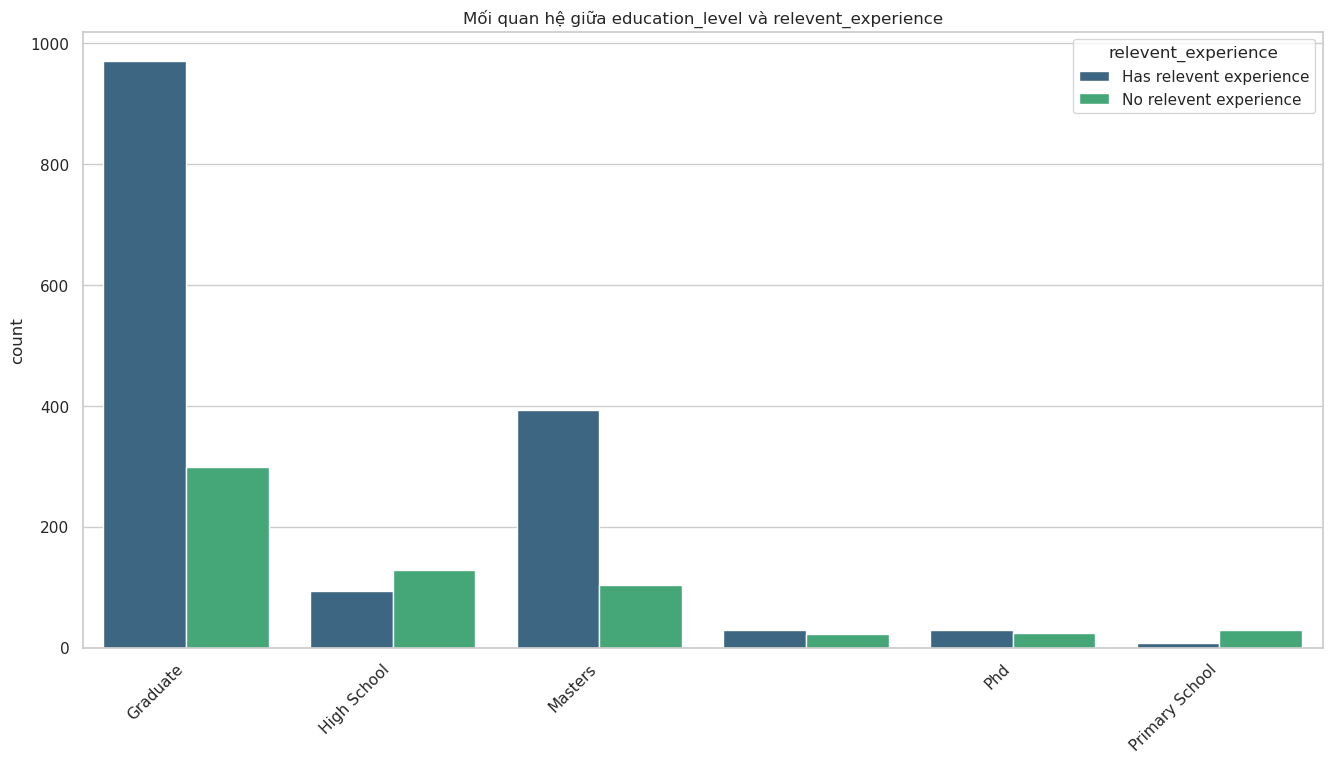

In [10]:
# Mối quan hệ giữa hai biến phân loại
if data.size > 0:
    plot_categorical_vs_categorical(data, 'education_level', 'relevent_experience')

#### Quan sát chính:

*   Biểu đồ này so sánh số lượng người "Có kinh nghiệm liên quan" và "Không có kinh nghiệm liên quan" ở từng cấp độ học vấn.
*   **Xu hướng rõ rệt:** Ở các bậc học cao như **`Graduate`**, **`Masters`**, và **`Phd`**, số lượng người có kinh nghiệm liên quan luôn **vượt trội** so với số người không có kinh nghiệm.
*   **Xu hướng ngược lại:** Ở bậc học **`High School`** và **`Primary School`**, số lượng người không có kinh nghiệm liên quan lại **nhiều hơn**.

#### Ý nghĩa:

*   Có một mối liên hệ giữa trình độ học vấn và việc sở hữu kinh nghiệm liên quan.
*   Những người có bằng cấp cao từ Cử nhân trở lên thường đã tích lũy được kinh nghiệm trong lĩnh vực của họ, có thể thông qua thực tập hoặc công việc sau khi tốt nghiệp.
*   Ngược lại, những người có trình độ học vấn thấp hơn thường là những người mới bắt đầu sự nghiệp hoặc đang tìm cách chuyển ngành, do đó họ chưa có kinh nghiệm liên quan.
*   Thông tin này rất hữu ích, nó cho thấy hai đặc trưng `education_level` và `relevent_experience` không hoàn toàn độc lập mà có sự liên kết logic với nhau.

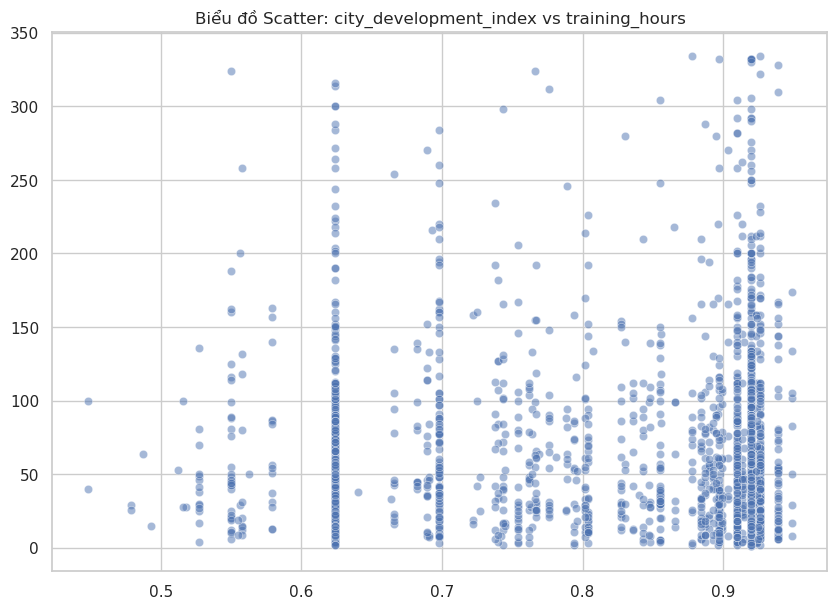

In [11]:
# Mối quan hệ giữa hai biến số
if data.size > 0:
    plot_scatter_numerical(data, 'city_development_index', 'training_hours')

#### Quan sát chính:

*   Biểu đồ này là một biểu đồ phân tán, trong đó mỗi điểm đại diện cho một ứng viên, thể hiện mối quan hệ giữa `city_development_index` và `training_hours`.
*   Không có một xu hướng rõ ràng nào có thể được quan sát từ đám mây điểm dữ liệu này. Các điểm được phân tán khắp biểu đồ.
*   Một điểm đáng chú ý là các chấm dữ liệu có xu hướng tạo thành các "cột dọc" tại một số giá trị `city_development_index` nhất định. Điều này xảy ra vì nhiều ứng viên đến từ cùng một thành phố, do đó họ có cùng một chỉ số phát triển.
*   Ở mọi mức độ phát triển của thành phố, `training_hours` đều có sự phân tán rất rộng, từ rất thấp đến rất cao.

#### Ý nghĩa:

*   Biểu đồ này xác nhận lại kết quả từ heatmap: **Không có mối tương quan tuyến tính** giữa chỉ số phát triển của thành phố và số giờ đào tạo mà một ứng viên tham gia.
*   Điều này có nghĩa là chỉ số phát triển của thành phố không phải là một yếu tố dự báo tốt cho số giờ đào tạo của một ứng viên. Hai đặc trưng này cung cấp những thông tin độc lập và không ảnh hưởng lẫn nhau.